In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np



In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 188s 1us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape


(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 128s 80ms/step - loss: 1.8107 - accuracy: 0.3537
Epoch 2/5
1563/1563 [==============================] - 130s 83ms/step - loss: 1.6229 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 126s 80ms/step - loss: 1.5419 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4807 - accuracy: 0.4768
Epoch 5/5
1563/1563 [==============================] - 126s 80ms/step - loss: 1.4314 - accuracy: 0.4953


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.49      0.55      1000
           1       0.72      0.30      0.43      1000
           2       0.50      0.19      0.28      1000
           3       0.31      0.43      0.36      1000
           4       0.53      0.26      0.35      1000
           5       0.44      0.34      0.39      1000
           6       0.46      0.66      0.55      1000
           7       0.41      0.69      0.51      1000
           8       0.81      0.29      0.43      1000
           9       0.35      0.79      0.48      1000

    accuracy                           0.45     10000
   macro avg       0.52      0.45      0.43     10000
weighted avg       0.52      0.45      0.43     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4608 - accuracy: 0.4771
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1143 - accuracy: 0.6111
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9914 - accuracy: 0.65561s - loss: 0.9 - ETA: 0s - loss: 0.9917 
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9194 - accuracy: 0.6806
Epoch 5/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8593 - accuracy: 0.7024
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8116 - accuracy: 0.7168
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7615 - accuracy: 0.7375
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7262 - accuracy: 0.7466
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6877 - accuracy: 0.7608
Epoch 10/10
1563/1563 [=

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9095 - accuracy: 0.7004


[0.9094937443733215, 0.7003999948501587]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.60108097e-04, 7.41649592e-06, 8.35975108e-04, 7.39026368e-01,
        1.95913071e-05, 2.31981784e-01, 5.61265880e-03, 1.24165035e-05,
        2.20799800e-02, 6.36149780e-05],
       [1.73765291e-02, 1.25306407e-02, 3.00969054e-06, 5.29519584e-09,
        5.79055701e-08, 5.96444560e-10, 1.05432507e-09, 3.35265171e-09,
        9.69981551e-01, 1.08262619e-04],
       [1.26478612e-01, 8.45190510e-02, 5.33395563e-04, 7.60303577e-04,
        1.52162625e-03, 2.19988957e-04, 1.38018542e-04, 1.61107839e-03,
        7.17330754e-01, 6.68871626e-02],
       [4.61080402e-01, 1.35769765e-03, 5.88796288e-03, 2.19852035e-03,
        2.97273602e-03, 5.08713383e-05, 4.53975699e-05, 1.42696153e-04,
        5.26060402e-01, 2.03325995e-04],
       [6.50042239e-07, 6.58328190e-06, 1.89165398e-02, 7.74871092e-03,
        8.67769778e-01, 1.04584650e-03, 1.04461648e-01, 4.73849868e-05,
        4.83334418e-07, 2.37853806e-06]], dtype=float32)

In [20]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [25]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [26]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

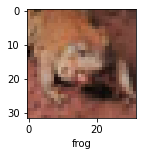

In [29]:
plot_sample(X_test, y_test,5)

In [30]:
classes[y_classes[5]]

'frog'

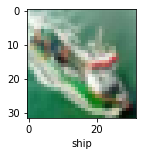

In [31]:
plot_sample(X_test, y_test,15)

In [32]:
classes[y_classes[15]]

'ship'